## Preface:
This notebook intends to solve Adobe's assigned assesment in Python language. 

Author and programmer: Mo Minoneshan 

email: minoneshan@utexas.edu

Github: https://github.com/Minouneshan

Linkedin: https://www.linkedin.com/in/minoneshan/



## Phase Zero:
Before we start the challenges, let's import the required libraries and then read the data sets and explore them in Pandas dataframe format:
#### Assumption #0.1: 
It's been assumed that the 4-slide deck which includes the assumptions, the methods, and the findings along with the recommendation would explain the project and phases step by step.
#### Assumption #0.2:
We assume the Audience is aware of the data and the variables, who are the interviewers.
#### Assumption #1: (variable recognition)
 based on the internet search, MROI Spend Value or Marketing return on Investment Spend Value represents the amount of money spent on marketing activities for each combination of Geo Desc (geographical region), Fiscal Qtr/Year (financial quarter and year), and Internal Order Desc (internal order description).

#### Assumption #2: (variable recognition)
We assume Booking_prof is the tracable amount of booking which happend after a prior pipe transaction. 
We also don't need to take further assumption for other variables of Pipe Booking table.

#### Note #1: removing 'Version' Column
Since the Version Column is only made of one variable, we ignore this Column in further analysis. 

#### Note #2: Second Sheet in the Internal Order lookup or the columns 'solution_group' & 'application_name' in Pipe and booking confirms that 'solution_group' is a subcategory for 'application_name' variable. Hence we would skip using the second sheet of Internal_order_lookup data.

In [ ]:
# In case any libraries was not found we can use the command:[ ! pip install (package)]
# importing nessecary libraries
import numpy as np
import pandas as pd

# plotting libraries
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# ml libraries
import sklearn as sk

# mount to google drive to get access to data sets - we can comment these two lines below in case not mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading the data tables to dataframe format- Marketing Spend & Pipe and booking targets


marketing_spend = pd.read_excel('YOUR DIR/Marketing Spend [30].xlsx') 

pipe_booking = pd.read_excel('YOUR DIR/Pipe and booking targets[31].xlsx') 

In [ ]:
# reading internal lookup data to dataframe - (only first sheet is useful!)

internal_order_lookup = pd.ExcelFile('YOUR DIR/internal_order_lookup[14].xlsx')


# We only need the first sheet which is internal_order_lookup1
internal_order_lookup1 = pd.read_excel(internal_order_lookup, 'internal_order_lookup')
internal_order_lookup2 = pd.read_excel(internal_order_lookup, 'application mapping ')

In [ ]:
# Marketing Spend info and head
print(marketing_spend.info())
print(marketing_spend.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46947 entries, 0 to 46946
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Fiscal Qtr/Year            46947 non-null  object 
 1   Version                    46947 non-null  object 
 2   Fiscal Qtr/Year & Version  46947 non-null  object 
 3   Fiscal Year                46947 non-null  int64  
 4   Geo Desc                   46947 non-null  object 
 5   Internal Order Desc        36534 non-null  object 
 6   MROI Spend Value           46947 non-null  float64
dtypes: float64(1), int64(1), object(5)
memory usage: 2.5+ MB
None
  Fiscal Qtr/Year  Version Fiscal Qtr/Year & Version  Fiscal Year Geo Desc  \
0         2022-Q4  Actuals           2022-Q4 Actuals         2022    Other   
1         2022-Q4  Actuals           2022-Q4 Actuals         2022    Other   
2         2022-Q4  Actuals           2022-Q4 Actuals         2022    Other   
3        

In [ ]:
# Internal Order Disc unique values
print(marketing_spend['Internal Order Desc'].unique(),'\n\n')
print('And the number of unique values in the "Internal Order Desc" Column is:',marketing_spend['Internal Order Desc'].nunique())

[nan 'Accelio Tradeshows' 'Server & solution e-seminars'
 'Global Site Council Expenses' 'Executive Engagement' 'Deal Acceleration'
 'Awareness' 'Demand creation' 'Enablement' 'Infrastructure'
 'Strategic Partnerships' 'Microsoft' 'Retention Services'
 'Use Case/Sales Play' 'Discover/Awareness' 'Explore/Demand Creation'
 'Evaluate/Buy/Deal Acceleration' 'Use/Retention Services' 'Adobe Summit'
 'DX-WF' 'Better Cust Exp All' 'Future of CX' 'ACS Services Mktg'
 'Content: Creation' 'B2C CJM: Creation' 'B2B CJM: Creation'
 'D&I: Creation' 'Profile/Acti: Creation' 'Work Mgmt: Creation'
 'Commerce: Creation' 'FSI: Progression' 'Retail: Progression'
 'M&E: Progression' 'Healthcare: Progression' 'Public Sector: Progression'
 'B2B Tech: Progression' 'T&H: Progression' 'Content: Progression'
 'B2C CJM: Progression' 'B2B CJM: Progression' 'D&I: Progression'
 'Prfle/Acti: Progres' 'Work Mgmt: Progression' 'Commrce: Progression'
 'Advocacy' 'Advocacy: Cmty Mktg' 'Adoption: AEM' 'Adoption: Marketo'
 

In [ ]:
# Pipe and booking targets info and head
print(pipe_booking.info())
print(pipe_booking.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23309 entries, 0 to 23308
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fiscal_yr             23309 non-null  int64 
 1   fiscal_qtr            23309 non-null  object
 2   account_segmentation  23309 non-null  object
 3   solution_group        23309 non-null  object
 4   application_name      23309 non-null  object
 5   geo                   23309 non-null  object
 6   market_area           23309 non-null  object
 7   reporting_hierarchy   23309 non-null  object
 8   sales_team            23309 non-null  object
 9   sales_region          23309 non-null  object
 10  bookings_prof         23309 non-null  int64 
 11  bookings_tgt          23309 non-null  int64 
 12  pipe_actuals          23309 non-null  int64 
 13  pipe_tgt              23309 non-null  int64 
dtypes: int64(5), object(9)
memory usage: 2.5+ MB
None
   fiscal_yr fiscal_qtr     account_

In [ ]:
# Checking if we have duplicated rows in the pipe and booking targets
pipe_booking[pipe_booking.duplicated()]

,fiscal_yr,fiscal_qtr,account_segmentation,solution_group,application_name,geo,market_area,reporting_hierarchy,sales_team,sales_region,bookings_prof,bookings_tgt,pipe_actuals,pipe_tgt


=> Which shows every row is unique

In [ ]:
# Internal lookup head and info (first sheet)
print(internal_order_lookup1.head())
print(internal_order_lookup1.info())

        internal.order.desc solution_specific
0       Better Cust Exp All               all
1         Content: Creation           Content
2        Commerce: Creation          Commerce
3  Multi-Solution: Creation               all
4         B2B CJM: Creation               CJM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   internal.order.desc  64 non-null     object
 1   solution_specific    65 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB
None


In [ ]:
# Internal lookup head and info (second sheet)
print(internal_order_lookup2)

                                    Application name Solution mapping 
0      application_name %in% c("Analytics","Targe...            "D&I",
1      application_name %in% c("Assets","Forms","...        "Content",
2      application_name %in% c("Campaign","Market...            "CJM",
3      application_name == "Customer Data Platform"             "P&A",
4                    application_name == "Commerce"        "Commerce",
5             application_name == "Premier Support"         "Support",
6                   application_name == "Workfront"       "Workfront",
7                                              TRUE          "discard"


This sheet is created for SQL based queries which we don't need for our further processing and mapping.

## Phase One: Mapping two Tables (Data preprocessing)
### Instruction:
Map the spend and targets file to each other on a geo, fiscal quarter, and solution
level ( for solution level mapping you have been given the file Internal order lookup).
(Hint: Think how geo tagged as “Other” will be reallocated to different regions for
spend).

#### Method #1: Mapping the Tables
We first map Market Spend with Internal lookup based on 'Internal Order Desc' Column, and after we aggregate the merged table based on 'Geo Desc', 'Fiscal Qtr/Year', 'solution_group' and finally left merge Pipe and booking with the priorly merged data based on the same three columns we used for aggregation. 

### First step: mapping Market Spend and Internal Lookup

So first we will map (merge in python) Marekting spend data to the Internal lookup. In order to do that, we rename the both data sets' column names the same to be able mapping them. Next, before mapping we would reallocate Geo Desc 'other' to other values which we will explain later. Also the next steps will be explained as we move forward. 

In [ ]:
# Preprocessing marketing_spend data, making sure we only have year 2022
marketing_spend = marketing_spend[marketing_spend['Fiscal Year'] == 2022].reset_index(drop = True)

In [ ]:
# Preprocessing internal_order_lookup1 data, matching the column names for mapping to the two other tables
internal_order_lookup1 = internal_order_lookup1.rename(columns={'internal.order.desc': 'Internal Order Desc', 'solution_specific': 'solution_group'})
internal_order_lookup1.head()

,Internal Order Desc,solution_group
0,Better Cust Exp All,all
1,Content: Creation,Content
2,Commerce: Creation,Commerce
3,Multi-Solution: Creation,all
4,B2B CJM: Creation,CJM


### Second Step: Reallocation Geo Desc 'other' to other values
In order to reallocate, we define the table non_other_spend which exludes any rows including with 'other' Geo Desc, and then we calculate their proportion of MROI Spend Value to the total summation. 
Second we calcualte the summation of MROI Spend Value for the columns with 'other' Geo Desc named 'other_spend_total'. 

#### Assumption #3: Ignoring 'Internal Order Desc' Column after mapping
Since after mapping Marketing Spend and Internal lookup, and also in the further steps we are required to map Marketing Spend to the Pipe And booking based on the context of the questions, we ignore 'Internal Order Desc' since we are able to map them to the destination table. We can use this table for further investigation which should be advised. But due to the approach of challenges, we will ignore this column.

#### Method #2: Reallocation Formula
And lastly to reallocate other's data, we calculate the reallocated value by the formula: 

portion of every non_other_spend's MROI Spend Value to their total summation, multiplying to the other_spend total summation of MROI Spend Value and adding the result to their own MROI Spend Value.

In [ ]:
# reallocating Geo Desc 'other' to other ones

# Calculate non_other_spend, excluding rows with 'other' Geo Desc; And non_other_spend_total, the summation of MROI Spend Value column
non_other_spend = marketing_spend[marketing_spend['Geo Desc'] != 'Other'].reset_index(drop=True)
non_other_spend_total = non_other_spend['MROI Spend Value'].sum()

# Calculate other_spend, excluding rows NOT with 'other' Geo Desc; And other_spend_total, the summation of MROI Spend Value column
other_spend = marketing_spend[marketing_spend['Geo Desc'] == 'Other'].reset_index(drop=True)
other_spend_total = other_spend['MROI Spend Value'].sum()

# reallocating the MROI Spend Value for the non_other_spend rows, according to the mentioned formula. 
non_other_spend['MROI Spend Value'] = (non_other_spend['MROI Spend Value']/non_other_spend_total) * other_spend_total + non_other_spend['MROI Spend Value'] 

non_other_spend.head()

,Fiscal Qtr/Year,Version,Fiscal Qtr/Year & Version,Fiscal Year,Geo Desc,Internal Order Desc,MROI Spend Value
0,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,3570.062115
1,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,3756.538130
2,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,4632.233734
3,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,4081.281872
4,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,0.000000


### Third Step: Mapping after reallocation & aggregating the Mapped data on three columns
Since now we have reallocated 'other' to the other Geo Descs, we are able good to map the Modified Marketing Spend(non_other_spend) to the internal order lookup.
#### Method #3: Aggregation before mapping
In order to map the Mapped targets and Pipe and Booking data, we would aggregate Mapped Column to have nonidentical rows to be able map them to Pipe and Booking data 
#### Method #4: Using mean value for MROI aggregated table
 Using Mean for aggragating the indentical rows
Next, since we have multiple identical rows with different MROI Spend Values, we will aggrergate(Groupby in Python) them based on their MROI Spend Value mean as an estimate.  
Reason: The values for mapping will be in way larger scale and makes the MROI data unreasonable and unuseful!

In [ ]:
# Merge the Modified Marketing Spend(non_other_spend) and internal_order_lookup to acquire solution mapping, and mapping happened on the key variable Internal Order Desc. 
mapped_targets = pd.merge(non_other_spend, internal_order_lookup1, on='Internal Order Desc', how='left')
mapped_targets.head()

,Fiscal Qtr/Year,Version,Fiscal Qtr/Year & Version,Fiscal Year,Geo Desc,Internal Order Desc,MROI Spend Value,solution_group
0,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,3570.062115,all
1,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,3756.538130,all
2,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,4632.233734,all
3,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,4081.281872,all
4,2022-Q4,Actuals,2022-Q4 Actuals,2022,EMEA,NaN,0.000000,all


In [ ]:
# double checking
mapped_targets['Geo Desc'].unique()

array(['EMEA', 'Asia', 'Japan', 'Americas'], dtype=object)

In [ ]:
# double checking
mapped_targets['solution_group'].unique()

array(['all', 'Content', 'CJM', 'D&I', 'P&A', 'Workfront', 'Commerce'],
      dtype=object)

In [ ]:
# Aggregating rows based on identical 'Geo Desc', 'Fiscal Qtr/Year', 'solution_group' and assume their MROI Spend Value's mean value 
aggregated_MS = mapped_targets.groupby(['Geo Desc', 'Fiscal Qtr/Year', 'solution_group']).mean().reset_index()

<ipython-input-16-b57d9f3616d5>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_MS = mapped_targets.groupby(['Geo Desc', 'Fiscal Qtr/Year', 'solution_group']).mean().reset_index()


In [ ]:
# Droppoing Fiscal Year since we gonna have duplicate rows while we map the tables
aggregated_MS = aggregated_MS.drop(['Fiscal Year'], axis=1)
aggregated_MS.head()

,Geo Desc,Fiscal Qtr/Year,solution_group,MROI Spend Value
0,Americas,2022-Q1,CJM,2238.545082
1,Americas,2022-Q1,Commerce,2156.843885
2,Americas,2022-Q1,Content,2465.404939
3,Americas,2022-Q1,D&I,2362.333645
4,Americas,2022-Q1,P&A,2053.718194


### Fourth Step: Mapping the aggregated Market Spend Value data with Pipe and Booking data
First we preprocess pipe booking data to be indentical with the other table. 

Second, as the question has asked, we map two tables on 'Fiscal Qtr/Year', 'Geo Desc', 'solution_group'. 


In [ ]:
# preprocessing pipe_booking data for merging(mapping with the key table)
pipe_booking = pipe_booking.rename(columns={'fiscal_yr': 'Fiscal Year', 'fiscal_qtr': 'Fiscal Qtr/Year', 'geo': 'Geo Desc'})
pipe_booking = pipe_booking[pipe_booking['Fiscal Year'] == 2022].reset_index(drop = True)
print(pipe_booking.head())
print(pipe_booking.info())

   Fiscal Year Fiscal Qtr/Year     account_segmentation solution_group  \
0         2022         2022-Q2             Industry Led        Content   
1         2022         2022-Q4             Industry Led        Content   
2         2022         2022-Q1        Solution Led High            CJM   
3         2022         2022-Q3             Industry Led      Workfront   
4         2022         2022-Q1  Solution Led Greenfield        Content   

  application_name  Geo Desc    market_area reporting_hierarchy  \
0           Assets  AMERICAS  UNITED STATES       PUBLIC SECTOR   
1            Sites  AMERICAS         CANADA              CANADA   
2         Campaign  AMERICAS  UNITED STATES           SOLUTIONS   
3        Workfront  AMERICAS         CANADA              CANADA   
4           Assets  AMERICAS  UNITED STATES   GROWTH GREENFIELD   

                  sales_team       sales_region  bookings_prof  bookings_tgt  \
0           AMER PUB SEC DOD      PUBLIC SECTOR            750          

In [ ]:
# Hint part for pipe_booking: check if 'other' exists at pipe_booking
pipe_booking['Geo Desc'].unique()

array(['AMERICAS', 'APAC', 'EMEA', 'JAPAN'], dtype=object)

In [ ]:
# Merge the aggregated_data and pipe_booking_targets on 'Fiscal Qtr/Year', 'Geo Desc', and 'solution_group'
combined_data = pd.merge(pipe_booking,aggregated_MS , on=['Fiscal Qtr/Year', 'Geo Desc', 'solution_group'], how='left')

# Dropping Fiscal year column since our data is only for the year 2022, and also we have the year on another column
combined_data = combined_data.drop(['Fiscal Year'], axis=1)

In [ ]:
combined_data['MROI Spend Value'].unique()

array([          nan, 2312.71756475, 2116.51186623, 2215.93188533,
       2319.81793994, 2074.96389865, 2167.70669954, 2152.165006  ,
       2308.74965182, 2191.15078527, 2204.14800993, 2213.88880858,
       2384.3352657 , 2235.86953064, 2025.02278489, 2232.97296211,
       1576.62880668, 2232.26820444, 2046.79205452, 1908.63948065,
       1999.77686171, 2016.71337914, 2320.89018121, 2144.6066119 ])

In [ ]:
combined_data.head()

,Fiscal Qtr/Year,account_segmentation,solution_group,application_name,Geo Desc,market_area,reporting_hierarchy,sales_team,sales_region,bookings_prof,bookings_tgt,pipe_actuals,pipe_tgt,MROI Spend Value
0,2022-Q2,Industry Led,Content,Assets,AMERICAS,UNITED STATES,PUBLIC SECTOR,AMER PUB SEC DOD,PUBLIC SECTOR,750,9954,6388,21634,NaN
1,2022-Q4,Industry Led,Content,Sites,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,2078,5299,11745,48480,NaN
2,2022-Q1,Solution Led High,CJM,Campaign,AMERICAS,UNITED STATES,SOLUTIONS,AMER SOL CJM,SOLUTIONS,4555,1885,27499,10851,NaN
3,2022-Q3,Industry Led,Workfront,Workfront,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,4791,6993,10589,24448,NaN
4,2022-Q1,Solution Led Greenfield,Content,Assets,AMERICAS,UNITED STATES,GROWTH GREENFIELD,AMER GROWTH GREENFIELD DF,GROWTH GREENFIELD,3089,8817,26938,24922,NaN


### Fifth Step: Make the data more clean & extracting the table which has filled MROI Spend Value

First, since the data is only for the year 2022, we split the column Fiscal Qtr/Year and remove year part, since we only care about the Quarter of the year.

Second, we extract a dataset which only contains the rows have filled MROI Spend Value.

And lastly, we exported both tables (in .xlsx format) for further use. 

In [ ]:
# Split column 'Fiscal Qtr/Year' using the '-' delimiter
df_split = combined_data['Fiscal Qtr/Year'].str.split('-', expand=True)

# Rename the columns in the resulting DataFrame
df_split.columns = ['year', 'quarter']

# Adding df_split to combined data and Dropping 'year','Fiscal Qtr/Year' Columns
combined_data = pd.concat([df_split,combined_data],axis=1)
combined_data = combined_data.drop(['year','Fiscal Qtr/Year'], axis=1)

In [ ]:
# Defining new table combined_data_cleaned, excluding the rows with 'Nan' MROI Spend Value  
combined_data_cleaned =  combined_data.dropna(subset=['MROI Spend Value']).reset_index(drop=True)
print(combined_data_cleaned.info())
print(combined_data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10790 entries, 0 to 10789
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quarter               10790 non-null  object 
 1   account_segmentation  10790 non-null  object 
 2   solution_group        10790 non-null  object 
 3   application_name      10790 non-null  object 
 4   Geo Desc              10790 non-null  object 
 5   market_area           10790 non-null  object 
 6   reporting_hierarchy   10790 non-null  object 
 7   sales_team            10790 non-null  object 
 8   sales_region          10790 non-null  object 
 9   bookings_prof         10790 non-null  int64  
 10  bookings_tgt          10790 non-null  int64  
 11  pipe_actuals          10790 non-null  int64  
 12  pipe_tgt              10790 non-null  int64  
 13  MROI Spend Value      10790 non-null  float64
dtypes: float64(1), int64(4), object(9)
memory usage: 1.2+ MB
None
  quarte

In [ ]:
# exporting both files in Excel Format
combined_data_cleaned.to_excel('/content/drive/MyDrive/Career Hunt/Adobe/Colab/Mapped Data reduced.xlsx')
combined_data.to_excel('/content/drive/MyDrive/Career Hunt/Adobe/Colab/Mapped Data.xlsx')

## Phase Two: Re-allocating Marketing Spend Data...

### Instruction:

Re-allocate or distribute spend data down to account segmentation and sales region
level in the targets file. Use any method and list your assumptions.

#### Assumption #4: Challenge Interpretation
Since we are going to reallocate the data, The interpretaion of question is that we want to total amount of MROI Spend Value to the total mapped table which is Combined_data datafrane which includes rows with empty or non empty MROI Spend Value. 

In [ ]:
# The data we are going to use!
combined_data.head()

,quarter,account_segmentation,solution_group,application_name,Geo Desc,market_area,reporting_hierarchy,sales_team,sales_region,bookings_prof,bookings_tgt,pipe_actuals,pipe_tgt,MROI Spend Value
0,Q2,Industry Led,Content,Assets,AMERICAS,UNITED STATES,PUBLIC SECTOR,AMER PUB SEC DOD,PUBLIC SECTOR,750,9954,6388,21634,NaN
1,Q4,Industry Led,Content,Sites,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,2078,5299,11745,48480,NaN
2,Q1,Solution Led High,CJM,Campaign,AMERICAS,UNITED STATES,SOLUTIONS,AMER SOL CJM,SOLUTIONS,4555,1885,27499,10851,NaN
3,Q3,Industry Led,Workfront,Workfront,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,4791,6993,10589,24448,NaN
4,Q1,Solution Led Greenfield,Content,Assets,AMERICAS,UNITED STATES,GROWTH GREENFIELD,AMER GROWTH GREENFIELD DF,GROWTH GREENFIELD,3089,8817,26938,24922,NaN


### First Step:
Aggregating combined_data on 'Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region' since the question asked us to reallocate down to 'account_segmentation', 'sales_region'. 
#### Method #5: Reallocation down to 5 columns instead of account_segmentation and sales_region
We acknowledge that in this phase to have a more accurate distribution of MROI spend value, we are using the 'Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region' columns to measure instead of 
#### Method #6: Note: Tried .corr() on combined_data_cleaned
In this segment, we also tried .corr() to measure correlation of the columns with existing MROI Spend Value data. But since our MROI Spend Value data is unvalid, we didn't get any insight to use at this stage. So we would use Booking target as the most reasanble Column.
#### Assumption #5: Using Booking Targets proportion to reallocate MROI Spend Value
Since we do not have enough MROI Spend Value data for each category (different ways tried to use MROI Value Spend from the available rows(Additional Step)), we need to estimate the proporation of distributed MROI Spend Value, based on the closest variable which has available data for each categroy, we will choose Booking Target which shows the amount of money the designated solution is estimated to generate the certain amount of booking (transaction) in dollars. And based on the Booking Target, company is able to spend that amount of money  aka MROI Spend Value. 

#### Method #7: Calculation of reallocated MROI Spend Value
We aggregate data based on the five mentioned columns (Method #5), we calculate the summation of booking target of each category and calculate the proportion of this category to the total summation in a new column. 
Next we merge this aggregated data to the main data (combined_data) and define a new dataframe combined_data_x. In the merged data we would have two new columns which we would use summation of the category the data row belongs to a new proportion aka bookings_tgt_proportion_b. By this approach, we have calculated the proportion of each row corresponding to those five columns. And now we calculate the total amount of MROI Spend Value from Marketing Spend value, and for the reallocated MROI Spend Value we have the corresponding formula:

Reallocated MROI Spend Value = 
(summation of MROI Spend Value from Marketing Spend data) * (proportion of booking target to the summation of the category it belongs regarding the five columns) * (proportion of each category to the total summation of booking Target)


In [ ]:
# Trying .corr() to see if this can help us with any lead or insight, which the answer shows NOT!
correlation = combined_data_cleaned['MROI Spend Value'].corr(combined_data_cleaned['bookings_tgt'])

print("Correlation between MROI Spend Value and bookings_tgt:", correlation)

Correlation between MROI Spend Value and bookings_tgt: -0.007622620862453726


In [ ]:
# Aggregating data based on the five columns: 'Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region'. And summation of each category's booking target:
combined_data_sum = combined_data.groupby(['Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region'])['bookings_tgt'].sum().reset_index()
# Defining bookings_tgt_proportion as the proportion of each cat to the total summation. 
combined_data_sum['bookings_tgt_proportion'] = combined_data_sum['bookings_tgt'] / combined_data_sum['bookings_tgt'].sum()

# Merge the aggregated combined_data_sum with the combined_data
combined_data_x = combined_data.merge(combined_data_sum, on=['Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region'], how = 'left',suffixes=('', '_sum'))

# Defining bookings_tgt_proportion as the proportion of each ropw to the total summation of its category. 
combined_data_x['bookings_tgt_proportion_b'] = (combined_data_x['bookings_tgt'] / combined_data_x['bookings_tgt_sum']) 

# reallocate spend data on target file by summation of total MROI Spend value on Marketing Spend file
sum_MROI = marketing_spend['MROI Spend Value'].sum()

# Calculating the reallocated MROI Spond Value based on the forumla mentioned in Method #7
combined_data_x['reallocated MROI Spend Value'] = combined_data_x['bookings_tgt_proportion'] * combined_data_x['bookings_tgt_proportion_b'] * sum_MROI

combined_data_x.head()

,quarter,account_segmentation,solution_group,application_name,Geo Desc,market_area,reporting_hierarchy,sales_team,sales_region,bookings_prof,bookings_tgt,pipe_actuals,pipe_tgt,MROI Spend Value,bookings_tgt_sum,bookings_tgt_proportion,bookings_tgt_proportion_b,reallocated MROI Spend Value
0,Q2,Industry Led,Content,Assets,AMERICAS,UNITED STATES,PUBLIC SECTOR,AMER PUB SEC DOD,PUBLIC SECTOR,750,9954,6388,21634,NaN,1148755,0.009863,0.008665,8207.148969
1,Q4,Industry Led,Content,Sites,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,2078,5299,11745,48480,NaN,214521,0.001842,0.024702,4369.065942
2,Q1,Solution Led High,CJM,Campaign,AMERICAS,UNITED STATES,SOLUTIONS,AMER SOL CJM,SOLUTIONS,4555,1885,27499,10851,NaN,117473,0.001009,0.016046,1554.196886
3,Q3,Industry Led,Workfront,Workfront,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,4791,6993,10589,24448,NaN,67496,0.000579,0.103606,5765.781871
4,Q1,Solution Led Greenfield,Content,Assets,AMERICAS,UNITED STATES,GROWTH GREENFIELD,AMER GROWTH GREENFIELD DF,GROWTH GREENFIELD,3089,8817,26938,24922,NaN,215447,0.001850,0.040924,7269.683792


In [ ]:
# Dropping the unnecessary columns and assigning a new dataframe
final_df = combined_data_x.drop(columns=['bookings_tgt_sum', 'bookings_tgt_proportion','bookings_tgt_proportion_b'])

print(final_df.head())
print(final_df.info())

  quarter     account_segmentation solution_group application_name  Geo Desc  \
0      Q2             Industry Led        Content           Assets  AMERICAS   
1      Q4             Industry Led        Content            Sites  AMERICAS   
2      Q1        Solution Led High            CJM         Campaign  AMERICAS   
3      Q3             Industry Led      Workfront        Workfront  AMERICAS   
4      Q1  Solution Led Greenfield        Content           Assets  AMERICAS   

     market_area reporting_hierarchy                 sales_team  \
0  UNITED STATES       PUBLIC SECTOR           AMER PUB SEC DOD   
1         CANADA              CANADA            AMER IND CANADA   
2  UNITED STATES           SOLUTIONS               AMER SOL CJM   
3         CANADA              CANADA            AMER IND CANADA   
4  UNITED STATES   GROWTH GREENFIELD  AMER GROWTH GREENFIELD DF   

        sales_region  bookings_prof  bookings_tgt  pipe_actuals  pipe_tgt  \
0      PUBLIC SECTOR            750    

#### Additional Step: Failure in trying MROI Spend Value for reallocation
by trying MROI Spend Value, we will not get access to every category and therefore we would fail MROI Spend Value for reallocation.

In [ ]:
#combined_data_sum = combined_data_x.groupby(['Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region'])['MROI Spend Value'].sum().reset_index()
#combined_data_sum_total = combined_data_sum['MROI Spend Value'].sum()


# Find the MROI proportions in regards to  'Geo Desc','Fiscal Qtr/Year' and 'solution_group'
#mroi_spend = mapped_targets.groupby(['Geo Desc','Fiscal Qtr/Year', 'solution_group'])['MROI Spend Value'].sum().reset_index()
#mroi_spend_total = mroi_spend['MROI Spend Value'].sum()

# Split column 'Fiscal Qtr/Year' using the '-' delimiter
#df_split = mroi_spend['Fiscal Qtr/Year'].str.split('-', expand=True)

# Rename the columns in the resulting DataFrame
#df_split.columns = ['year', 'quarter']

#mroi_spend = pd.concat([df_split,mroi_spend],axis=1)
#mroi_spend = mroi_spend.drop(['year','Fiscal Qtr/Year'], axis=1)

#data = combined_data.merge(mroi_spend, on=['Geo Desc','quarter', 'solution_group'], how = 'left')
#data.info()

#combined_data_sum_y = combined_data.groupby(['account_segmentation', 'sales_region'])['pipe_tgt'].sum().reset_index()
#combined_data_sum_total = combined_data_sum_y['pipe_tgt'].sum()

#### Assumption #6:
We also could use the reduced form to run a linear regression (supervided) or clustering methods like kmean (unsupervised) to estimate the missing MROI values. But since existing MROI Spend Value is unvalid, any conclusion or estimation based on this values would mislead us. 
Also the question is asking to re-allocate the exisiting MROI Spend Value data down to account segment and sales region, while we only can calcualte their proportions corresponding to their Booking target value since it's the closest value to their real market spend(MROI). Therefore we re-allocated MROI Spend Value between existing and non-existing ones.

## Phase Three: Marketing efficiency Metrics 
### Instruction:

Understand how will you measure the efficiency of marketing? You have been given
spend, pipe targets, booking targets, pipe actuals, and booking actuals. What metric
would you create to understand the efficiency of marketing dollars?

### Defining the Metrics, and their circumstances for measuring the efficiency
#### Assumption #7: KPI and funnel metrics
It's been assumed the audience of this investigation for measuring the efficiency of Marketing has a good understanding of the concepts such as KPI and marketing(or digital) funnel metrics. The essence of knowing these concepts makes the task of coming up with new the metrics and  easy and approachable. 
#### Method #7: Coming up with the metrics
So to come up with metrics to measure the efficiency if marketing, we would need some metrics to evaluate the solution in overall and whether it is profitable or not. for that purpose, we define MROI to measure whether we loose money on the business or not. 
Second, conversion_rate to measure the rate of converting from piping stage to the booking stage which measures the efficiency of Marketing piping straregy directly.
Third we define the metrics such as Pipeline Conversion Rate or 'pipe_eff', Booking Conversion Rate or 'booking_eff' to evaluate the efficieny of targeting goals.
and finally we define cost per booking and cost per piping to measure cost of converting to each stage. 

The in-detail definitions are as follows:


#### Marketing ROI (MROI):
MROI = (Gain from marketing efforts - Marketing spend) / `spend

This metric measures the return on investment from marketing activities. A higher MROI indicates a more efficient use of marketing dollars.

#### Conversion Rate (CR):
Conversion Rate = (Booking prof / pipe actuals ) * 100

#### Pipeline Conversion Rate (PCR):

Pipeline Conversion Rate = (Pipe actuals / Pipe targets) * 100

This metric measures the percentage of pipeline targets that were actually achieved. A higher rate indicates a more efficient marketing strategy in generating potential sales leads.

#### Booking Conversion Rate (BCR):

Booking Conversion Rate = (Booking profs / Booking targets) * 100

This metric measures the percentage of booking targets that were actually achieved. A higher rate indicates a more efficient marketing strategy in converting potential leads into actual bookings.

#### Cost per Pipeline (CPP):

CPP = Marketing spend / Pipe actuals

This metric measures the cost of generating each actual pipeline opportunity. A lower CPP indicates a more efficient use of marketing dollars in generating potential sales leads.

#### Cost per Booking (CPB):

CPB = Marketing spend / Booking actuals

This metric measures the cost of converting each actual booking. A lower CPB indicates a more efficient use of marketing dollars in converting potential leads into actual bookings.



#### Method and Assumption #8: Estimating booking actuals
For calculating the metrics such MROI or CPB we would underestimate our rates since booking prof is only a portion of the  bookings actually happend since it only provides the tracable amount of bookings which happend after piping stage directly. In order to re-evaluate booking actuals, we assume that the ratio of booking targeting to piping target is a priorly measured and estimamted portion that was been proved its efficieny to business. Hence we use this simplifying rule to estimate the booking actual. As follows the corresponding formula:

Booking actual = pipe actual * (booking target / pipe target)  
And this value would make more sense when we aggregate the data on certain columns which makes it closer to the real estimated average.
#### Method #9: choosing between the estimated booking actual versus booking prof
In some cases, the estimated booking actual would be less than booking prof amount, so in this case we pick the amount which has a higher amount.

### Method #10: Inefficiency of Booking prof for MROI 
In the code below we calculated MROI based on Booking prof which gets us to conclude that the majority of marketing efforts were not profitable. But Since that's not the case, we came up with the estimated booking actual to have a more reasonable MROI metric. 

#### Method #11: Defining functions for calculating the metrics in an aggregated mode
In case to avoid reaperting the same codes, we define two functions, one for only when we aggregate based on one column, and second one for time we have aggregated based on multiple columns. 



In [ ]:
# Calculate MROI (Marketing Return on Investment) for each row based on marketing prof
# final_df['MROI'] = (final_df['bookings_prof'] - final_df['reallocated MROI Spend Value']) / final_df['reallocated MROI Spend Value']

In [ ]:
# Function for calculating the metrics when we have aggregated data based on one column
def extract_metrics_based_on(main_df, target_col_name):
  agg_final_df = main_df.groupby([target_col_name]).sum().reset_index()
  tmpdf = pd.DataFrame()
  tmpdf[target_col_name] = agg_final_df[target_col_name]

  # Estimating booking actual after aggregation and based on the formula mentioned
  tmpdf['booking_actual_estimate'] = (agg_final_df['bookings_tgt'] * agg_final_df['pipe_actuals']) / agg_final_df['pipe_tgt']

  tmpdf['bookings_tgt'] = agg_final_df['bookings_tgt']
  tmpdf['bookings_prof'] = agg_final_df['bookings_prof']
  tmpdf['pipe_actuals'] = agg_final_df['pipe_actuals']
  tmpdf['pipe_tgt'] = agg_final_df['pipe_tgt']
  
  # Calculating the booking effective value which picks the higher value between estimated and prof 
  tmpdf['booking_effective_value']= tmpdf.apply(lambda row: row['booking_actual_estimate'] if row['booking_actual_estimate'] > row['bookings_prof'] else row['bookings_prof'], axis=1)
  
  # Calculating the metrics as mentioned above 
  tmpdf['mroi'] = (tmpdf['booking_effective_value'] - agg_final_df['reallocated MROI Spend Value']) / agg_final_df['reallocated MROI Spend Value']
  tmpdf['conversion_rate'] = tmpdf['bookings_prof'] / tmpdf['pipe_actuals']
  tmpdf['booking_eff'] = tmpdf['bookings_prof']  / tmpdf['bookings_tgt']
  tmpdf['pipe_eff'] = agg_final_df['pipe_actuals'] / agg_final_df['pipe_tgt']
  tmpdf['Cost per Pipeline'] = agg_final_df['reallocated MROI Spend Value'] / agg_final_df['pipe_actuals']
  tmpdf['Cost per Booking'] = agg_final_df['reallocated MROI Spend Value'] / tmpdf['booking_effective_value']
  return tmpdf

In [ ]:
# Function for calculating the metrics when we have aggregated data based on multiple columns
def extract_metrics_based_on_multi(main_df, col_list):
  agg_final_df = main_df.groupby(col_list).sum().reset_index()
  tmpdf = pd.DataFrame()
  tmpdf = agg_final_df[col_list]

  # Estimating booking actual after aggregation and based on the formula mentioned
  tmpdf['booking_actual_estimate'] = (agg_final_df['bookings_tgt'] * agg_final_df['pipe_actuals']) / agg_final_df['pipe_tgt']

  tmpdf['bookings_tgt'] = agg_final_df['bookings_tgt']
  tmpdf['bookings_prof'] = agg_final_df['bookings_prof']
  tmpdf['pipe_actuals'] = agg_final_df['pipe_actuals']
  tmpdf['pipe_tgt'] = agg_final_df['pipe_tgt']

  # Calculating the booking effective value which picks the higher value between estimated and prof 
  tmpdf['booking_effective_value']= tmpdf.apply(lambda row: row['booking_actual_estimate'] if row['booking_actual_estimate'] > row['bookings_prof'] else row['bookings_prof'], axis=1)
  
  # Calculating the metrics as mentioned above
  tmpdf['mroi'] = (tmpdf['booking_effective_value'] - agg_final_df['reallocated MROI Spend Value']) / agg_final_df['reallocated MROI Spend Value']
  tmpdf['conversion_rate'] = tmpdf['bookings_prof'] / tmpdf['pipe_actuals']
  tmpdf['booking_eff'] = tmpdf['bookings_prof'] / tmpdf['bookings_tgt']
  tmpdf['pipe_eff'] = agg_final_df['pipe_actuals'] / agg_final_df['pipe_tgt']
  tmpdf['Cost per Pipeline'] = agg_final_df['reallocated MROI Spend Value'] / agg_final_df['pipe_actuals']
  tmpdf['Cost per Booking'] = agg_final_df['reallocated MROI Spend Value'] / tmpdf['booking_effective_value']
  return tmpdf

In [ ]:
# Example: metrics after aggregating based on 'Geo Desc','application_name'
geo_app_metric = extract_metrics_based_on_multi(final_df, ['Geo Desc','application_name'])
geo_app_metric

<ipython-input-38-a5cc6a490a7e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_final_df = main_df.groupby(col_list).sum().reset_index()
<ipython-input-38-a5cc6a490a7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['booking_actual_estimate'] = (agg_final_df['bookings_tgt'] * agg_final_df['pipe_actuals']) / agg_final_df['pipe_tgt']
<ipython-input-38-a5cc6a490a7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Geo Desc,application_name,booking_actual_estimate,bookings_tgt,bookings_prof,pipe_actuals,pipe_tgt,booking_effective_value,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,AMERICAS,Analytics,1.899598e+06,3105130,1549292,9426879,15409408,1.899598e+06,-0.258028,0.164348,0.498946,0.611761,0.271585,1.347760
1,AMERICAS,Assets,1.841633e+06,3172293,1582088,9176716,15807294,1.841633e+06,-0.295899,0.172402,0.498721,0.580537,0.285024,1.420250
2,AMERICAS,Campaign,8.489403e+05,1326181,668165,3941649,6157488,8.489403e+05,-0.223610,0.169514,0.503826,0.640139,0.277408,1.288013
3,AMERICAS,Commerce,9.243976e+05,1560768,780104,4774942,8062090,9.243976e+05,-0.281667,0.163375,0.499821,0.592271,0.269504,1.392112
4,AMERICAS,Customer Data Platform,1.615577e+05,257551,125165,866656,1381600,1.615577e+05,-0.239201,0.144423,0.485981,0.627284,0.245025,1.314408
5,AMERICAS,Forms,1.770297e+06,2898814,1521554,8692532,14233790,1.770297e+06,-0.259319,0.175042,0.524888,0.610697,0.274960,1.350109
6,AMERICAS,Marketo,9.421486e+05,1490501,801464,4892327,7739775,9.421486e+05,-0.233358,0.163821,0.537715,0.632102,0.251195,1.304390
7,AMERICAS,Sites,2.002213e+06,3258596,1542309,9589419,15606754,2.002213e+06,-0.254779,0.160834,0.473305,0.614440,0.280177,1.341884
8,AMERICAS,Target,9.642435e+05,1630472,718525,4465317,7550556,9.642435e+05,-0.282737,0.160912,0.440685,0.591389,0.301062,1.394188
9,AMERICAS,Workfront,1.982836e+06,3268860,1542890,9351381,15416484,1.982836e+06,-0.264309,0.164991,0.471996,0.606583,0.288214,1.359265


In [ ]:
# Example: metrics based on aggregating on one column
geo_metric = extract_metrics_based_on(final_df, 'Geo Desc')
sales_team_metric = extract_metrics_based_on(final_df,'sales_team')
sales_regoin_metric = extract_metrics_based_on(final_df,'sales_region')
app_name_metric = extract_metrics_based_on(final_df,'application_name')
geo_metric

<ipython-input-139-168297b4d054>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-139-168297b4d054>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-139-168297b4d054>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

<ipython-input-139-168297b4d054>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to Fal

In [ ]:
# Example: metrics based on aggregating based on five columns:  'Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region'
geo_app_qtr_acc_sr_metric = extract_metrics_based_on_multi(final_df, [ 'Geo Desc', 'quarter', 'solution_group','account_segmentation', 'sales_region' ])
geo_app_qtr_acc_sr_metric

<ipython-input-38-a5cc6a490a7e>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agg_final_df = main_df.groupby(col_list).sum().reset_index()
<ipython-input-38-a5cc6a490a7e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmpdf['booking_actual_estimate'] = (agg_final_df['bookings_tgt'] * agg_final_df['pipe_actuals']) / agg_final_df['pipe_tgt']
<ipython-input-38-a5cc6a490a7e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

,Geo Desc,quarter,solution_group,account_segmentation,sales_region,booking_actual_estimate,bookings_tgt,bookings_prof,pipe_actuals,pipe_tgt,booking_effective_value,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,AMERICAS,Q1,CJM,Industry Led,CANADA,83920.317839,128367,64072,397272,607679,83920.317839,-0.207099,0.161280,0.499131,0.653753,0.266416,1.261191
1,AMERICAS,Q1,CJM,Solution Led Greenfield,GROWTH GREENFIELD,61376.333067,121655,66694,378938,751099,66694.000000,-0.335091,0.176002,0.548222,0.504511,0.264702,1.503966
2,AMERICAS,Q1,CJM,Solution Led High,SOLUTIONS,73824.556432,117473,64977,442657,704376,73824.556432,-0.237801,0.146789,0.553123,0.628439,0.218809,1.311994
3,AMERICAS,Q1,CJM,Solution Led Low,GROWTH INSTALL,31476.695958,61289,34962,197761,385065,34962.000000,-0.308139,0.176789,0.570445,0.513578,0.255527,1.445376
4,AMERICAS,Q1,CJM,Solution Led Low,LATAM,175895.168750,264019,151026,893713,1341465,175895.168750,-0.191976,0.168987,0.572027,0.666222,0.243574,1.237588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,JAPAN,Q4,Content,Solution Led Low,JAPAN,99273.600360,177489,104808,604296,1080407,104808.000000,-0.283810,0.173438,0.590504,0.559323,0.242168,1.396277
448,JAPAN,Q4,D&I,Solution Led Greenfield,JAPAN,60653.622710,120213,68261,410013,812629,68261.000000,-0.311306,0.166485,0.567834,0.504551,0.241740,1.452023
449,JAPAN,Q4,D&I,Solution Led High,JAPAN,74081.670996,123166,72016,440492,732349,74081.670996,-0.270500,0.163490,0.584707,0.601478,0.230541,1.370802
450,JAPAN,Q4,D&I,Solution Led Low,JAPAN,85765.671167,131279,72569,427672,654625,85765.671167,-0.207638,0.169684,0.552785,0.653308,0.253092,1.262050


#### Calculating the metrics for each row
Which may not give us very accurate valuen Since we don't have the booking actuals. As we aggregate the data, metrics would show more accurate and valid values.

In [ ]:
# Creating a new copy of final_df and include metrics
final_df_with_metrics = final_df.copy()

# Estimating booking actual after aggregation and based on the formula mentioned
final_df_with_metrics['booking_actual_estimate'] = (final_df_with_metrics['bookings_tgt'] * final_df_with_metrics['pipe_actuals']) / final_df_with_metrics['pipe_tgt']

# Calculating the booking effective value which picks the higher value between estimated and prof 
final_df_with_metrics['booking_effective_value']= final_df_with_metrics.apply(lambda row: row['booking_actual_estimate'] if row['booking_actual_estimate'] > row['bookings_prof'] else row['bookings_prof'], axis=1)

# Calculating the metrics as mentioned before
final_df_with_metrics['mroi'] = (final_df_with_metrics['booking_effective_value'] - final_df_with_metrics['reallocated MROI Spend Value']) / final_df_with_metrics['reallocated MROI Spend Value']
final_df_with_metrics['conversion_rate'] = final_df_with_metrics['bookings_prof'] / final_df_with_metrics['pipe_actuals']
final_df_with_metrics['booking_eff'] = final_df_with_metrics['bookings_prof'] / final_df_with_metrics['bookings_tgt']
final_df_with_metrics['pipe_eff'] = final_df_with_metrics['pipe_actuals'] / final_df_with_metrics['pipe_tgt']
final_df_with_metrics['Cost per Pipeline'] = final_df_with_metrics['reallocated MROI Spend Value'] / final_df_with_metrics['pipe_actuals']
final_df_with_metrics['Cost per Booking'] = final_df_with_metrics['reallocated MROI Spend Value'] / final_df_with_metrics['booking_effective_value']

final_df_with_metrics.head()

,quarter,account_segmentation,solution_group,application_name,Geo Desc,market_area,reporting_hierarchy,sales_team,sales_region,bookings_prof,...,MROI Spend Value,reallocated MROI Spend Value,booking_actual_estimate,booking_effective_value,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,Q2,Industry Led,Content,Assets,AMERICAS,UNITED STATES,PUBLIC SECTOR,AMER PUB SEC DOD,PUBLIC SECTOR,750,...,NaN,8207.148969,2939.176851,2939.176851,-0.641876,0.117408,0.075347,0.295276,1.284776,2.792329
1,Q4,Industry Led,Content,Sites,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,2078,...,NaN,4369.065942,1283.761448,2078.000000,-0.524383,0.176926,0.392149,0.242265,0.371994,2.102534
2,Q1,Solution Led High,CJM,Campaign,AMERICAS,UNITED STATES,SOLUTIONS,AMER SOL CJM,SOLUTIONS,4555,...,NaN,1554.196886,4777.035757,4777.035757,2.073636,0.165642,2.416446,2.534236,0.056518,0.325348
3,Q3,Industry Led,Workfront,Workfront,AMERICAS,CANADA,CANADA,AMER IND CANADA,CANADA,4791,...,NaN,5765.781871,3028.831684,4791.000000,-0.169063,0.452451,0.685114,0.433123,0.544507,1.203461
4,Q1,Solution Led Greenfield,Content,Assets,AMERICAS,UNITED STATES,GROWTH GREENFIELD,AMER GROWTH GREENFIELD DF,GROWTH GREENFIELD,3089,...,NaN,7269.683792,9530.228152,9530.228152,0.310955,0.114671,0.350346,1.080892,0.269867,0.762803


## Phase Four: Insights, recommendations and visualiztion about Spend Efficiency
### Instruction:

What insights can you draw about the spend efficiency of different GEOs, account
segments, and solution groups? What recommendations do you have for the team? Any
visualizations you could come up with to present the same?

#### Assumption #12: 
We only explore the insioghts and recommendations and visualiztion baed on the three asked columns

#### Assumption #13:
We assume that Spend Efficieny Metrics are any metrics related to MROI Spend Value. Which are MROI, Cost Per Pipeline and Cost per Booking.

### Aggregating data Based on 'Geo Desc', 'account_segmentation', 'solution_group' and by calculationg mean Spend Efficiency metrics which are MROI, Cost Per Pipeline and Cost per Booking
Here is data the in detail for every row



In [ ]:
# Group the data by GEO, account_segmentation, and solution_group
grouped_data = final_df_with_metrics.groupby(['Geo Desc', 'account_segmentation', 'solution_group']).agg({
    'mroi': 'mean',
    'Cost per Pipeline': 'mean',
    'Cost per Booking': 'mean'
}).reset_index()
grouped_data

,Geo Desc,account_segmentation,solution_group,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,AMERICAS,Industry Led,CJM,8.854300,0.450474,6.891765,1.721258,0.823189,1.088510
1,AMERICAS,Industry Led,Commerce,1.503644,0.195978,0.749385,1.666743,0.312902,1.215884
2,AMERICAS,Industry Led,Content,4.902424,1.059577,3.313755,2.010120,1.742661,1.248775
3,AMERICAS,Industry Led,D&I,3.665358,0.470506,2.414979,1.895245,1.012518,1.200338
4,AMERICAS,Industry Led,Workfront,5.697974,0.490874,1.977440,4.000297,0.888775,1.305685
...,...,...,...,...,...,...,...,...,...
65,JAPAN,Solution Led High,P&A,8.929465,0.341032,3.221771,5.530848,0.531195,0.970312
66,JAPAN,Solution Led Low,CJM,5.939030,0.300265,4.086727,2.019897,0.543662,1.236481
67,JAPAN,Solution Led Low,Commerce,0.773938,1.004254,1.116934,0.842495,1.395591,1.456024
68,JAPAN,Solution Led Low,Content,2.282975,0.455473,1.983501,1.205830,0.602982,1.097978


### Solely aggergation based on one of the mentioned columns

In [ ]:


# Analyze the spend efficiency for different GEOs
geo_efficiency = grouped_data.groupby('Geo Desc').agg({
    'mroi': 'mean',
    'Cost per Pipeline': 'mean',
    'Cost per Booking': 'mean'
}).reset_index()

# Analyze the spend efficiency for different account segments
account_efficiency = grouped_data.groupby('account_segmentation').agg({
    'mroi': 'mean',
    'Cost per Pipeline': 'mean',
    'Cost per Booking': 'mean'
}).reset_index()

# Analyze the spend efficiency for different solution groups
solution_efficiency = grouped_data.groupby('solution_group').agg({
    'mroi': 'mean',
    'Cost per Pipeline': 'mean',
    'Cost per Booking': 'mean'
}).reset_index()


### Bar Plot Based on GEO

#### Insight: mroi is higher for EMEA based on GEO while cost per booking is almost the same!

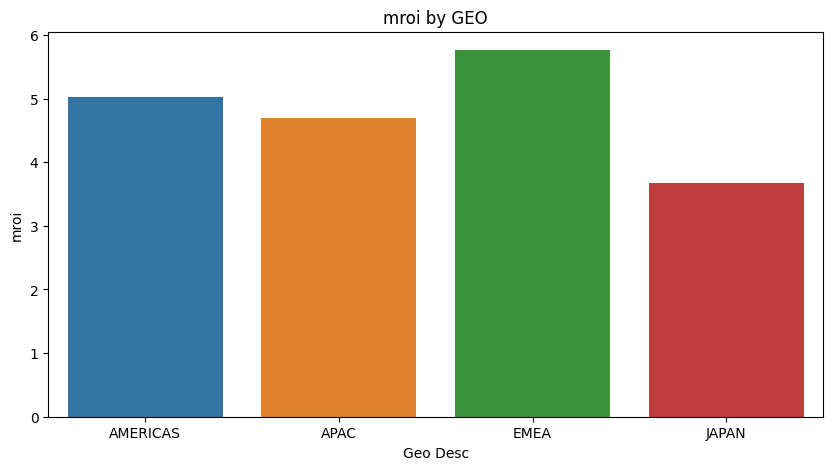

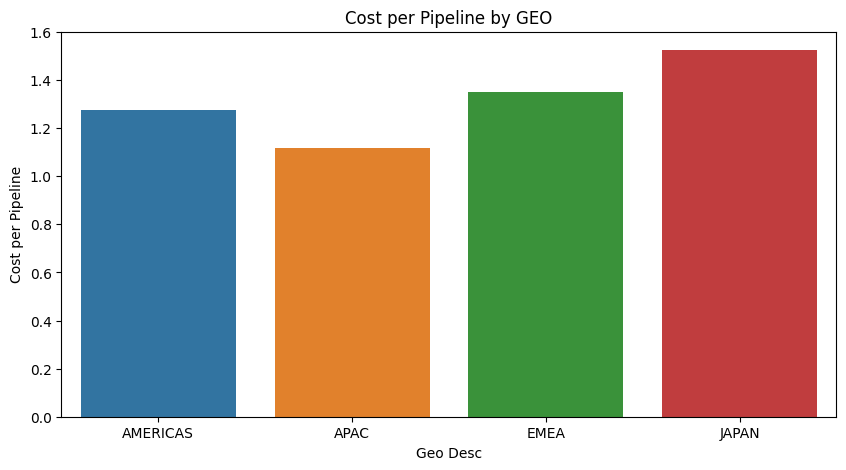

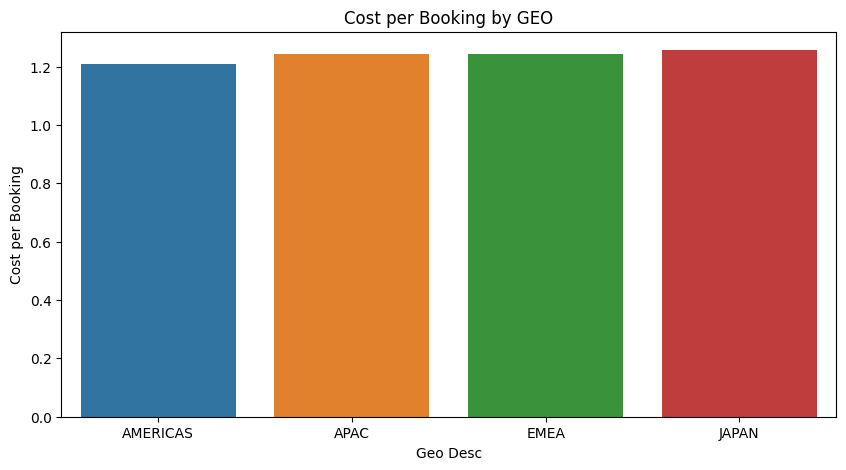

In [ ]:
# Bar chart for GEO efficiency
plt.figure(figsize=(10, 5))
sns.barplot(x='Geo Desc', y='mroi', data=geo_efficiency)
plt.title('mroi by GEO')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Geo Desc', y='Cost per Pipeline', data=geo_efficiency)
plt.title('Cost per Pipeline by GEO')
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Geo Desc', y='Cost per Booking', data=geo_efficiency)
plt.title('Cost per Booking by GEO')
plt.show()

### Bar plot Spending Efficiency Metrics(mroi, cost per booking, cost per pipeline)

<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)


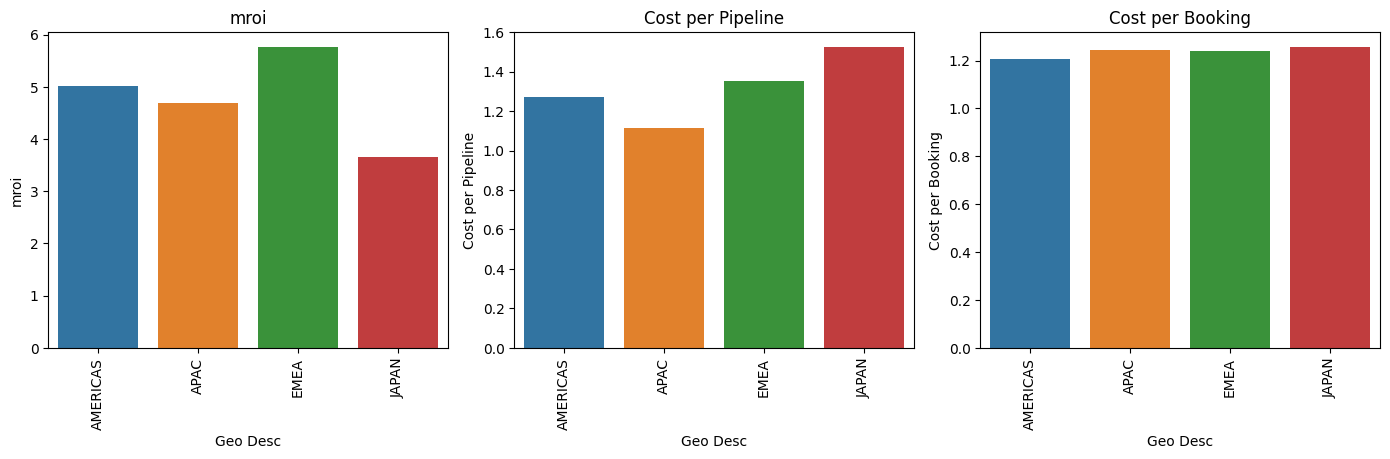

<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)


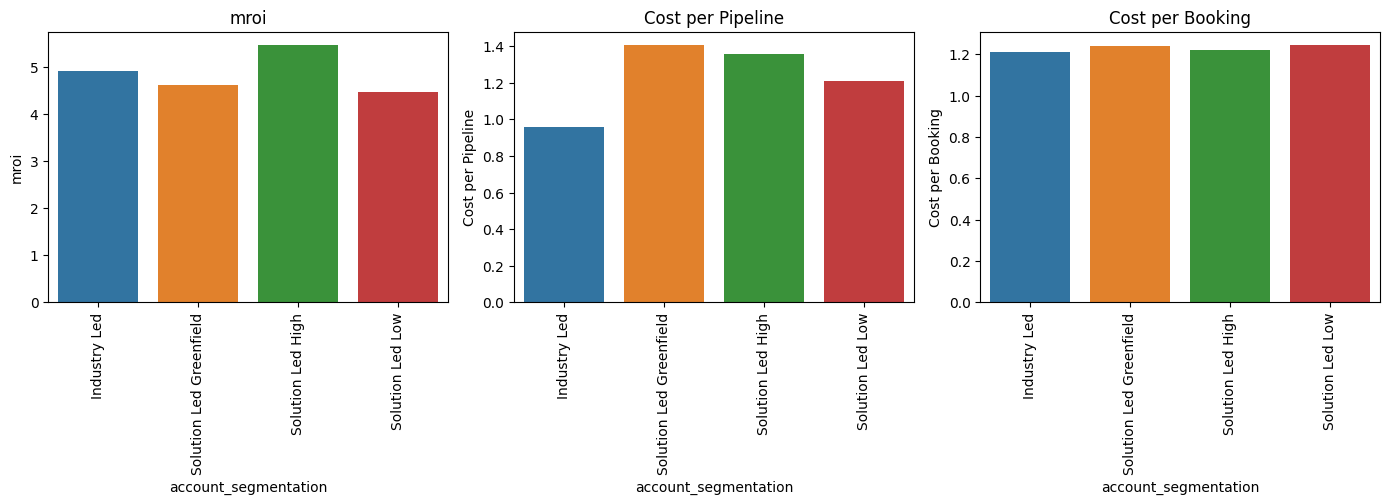

<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)
<ipython-input-49-2ac3950730dc>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=category, y=metric, data=data, ci=None)


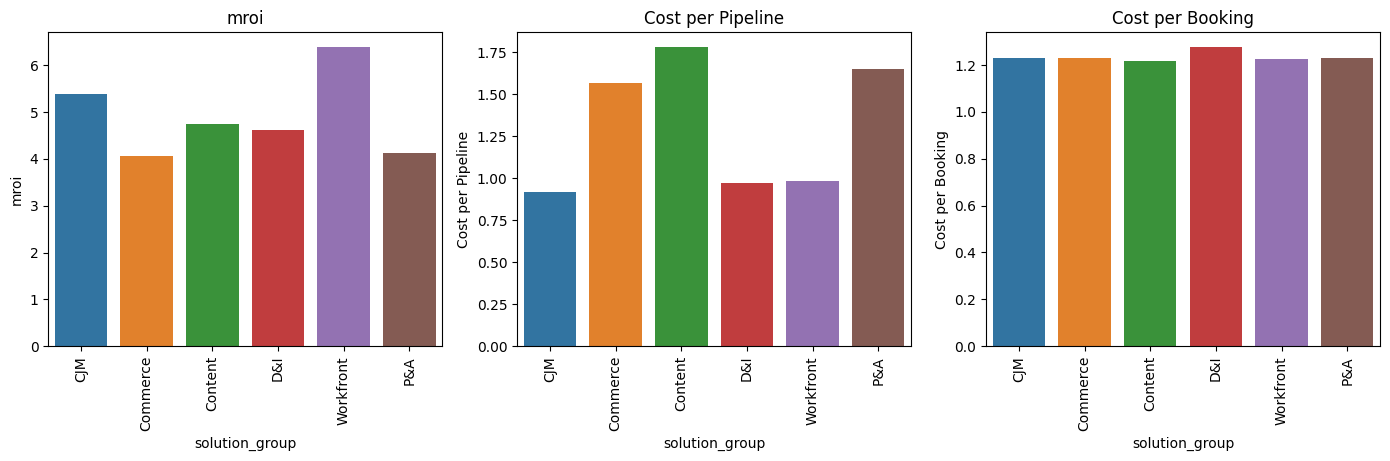

In [ ]:

# Function to plot efficiency metrics
def plot_efficiency_metrics(data, category):
    plt.figure(figsize=(14, 8))

    metrics = ['mroi',
    'Cost per Pipeline',
    'Cost per Booking']
    for i, metric in enumerate(metrics):
        plt.subplot(2, 3, i + 1)
        sns.barplot(x=category, y=metric, data=data, ci=None)
        plt.title(metric)
        plt.xticks(rotation=90)

    plt.tight_layout()
    plt.show()

# Plot efficiency metrics by GEO
plot_efficiency_metrics(grouped_data, 'Geo Desc')

# Plot efficiency metrics by account_segmentation
plot_efficiency_metrics(grouped_data, 'account_segmentation')

# Plot efficiency metrics by solution_group
plot_efficiency_metrics(grouped_data, 'solution_group')


### MROI heatmap
#### Insight #1 + Recommendation:
EMEA-workfront-Solution Led high is highly profitable. Hence, there is a good chance of more profit in additional investment.

#### Insight #2 + Recommendation:
Americas-P&A is highly unprofitable and further investigation is needed.

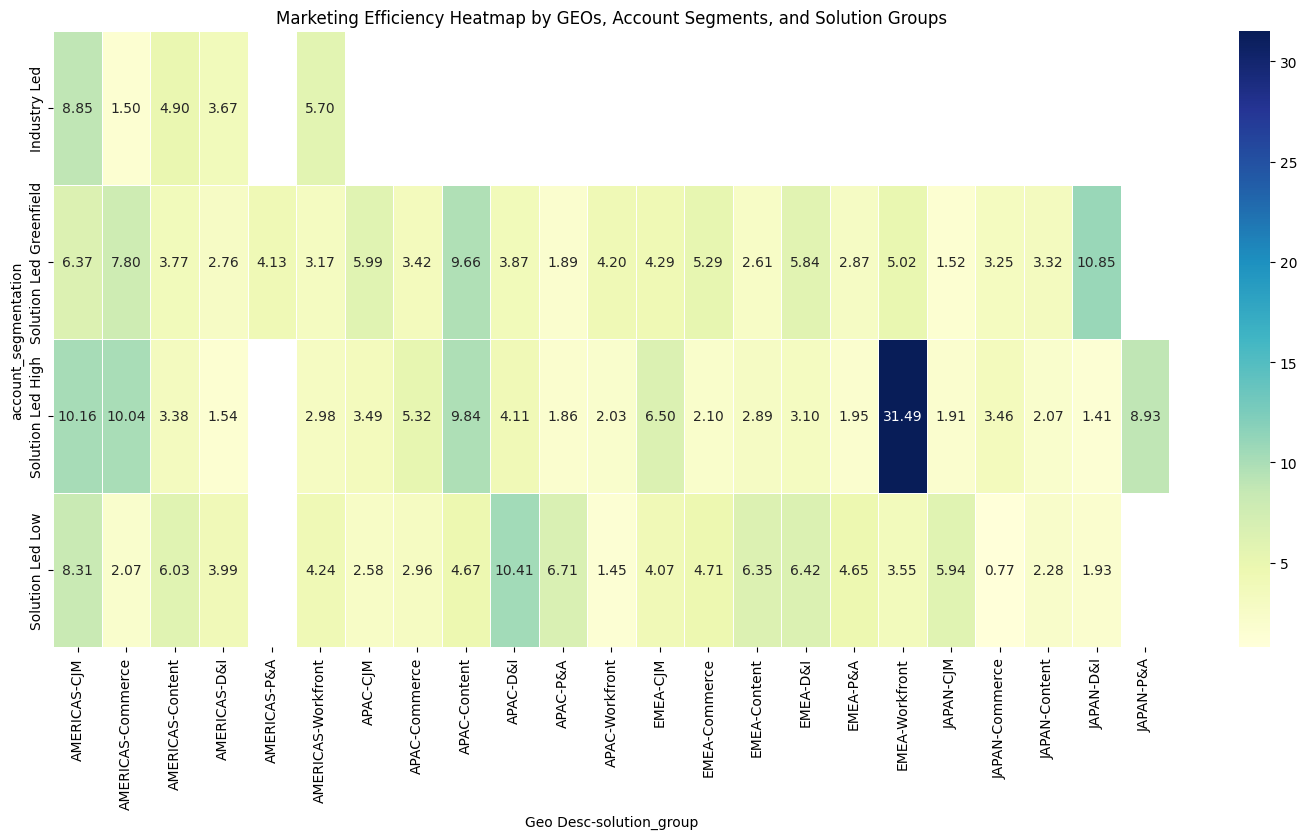

In [ ]:
# Pivot the data to create a matrix for the heatmap
heatmap_data = final_df_with_metrics.pivot_table(
    index='account_segmentation',
    columns=['Geo Desc', 'solution_group'],
    values='mroi',
    aggfunc='mean'
)

# Create the heatmap
plt.figure(figsize=(18, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt='.2f', linewidths=0.5)
plt.title('Marketing Efficiency Heatmap by GEOs, Account Segments, and Solution Groups')
plt.show()

### MROI bar plot regarding GEO and Account segmentation

####Insight #1: Solution Led High in EMEA has a higher MROI compoaring to the other accounts. Also be advised that we have a high variation as well.

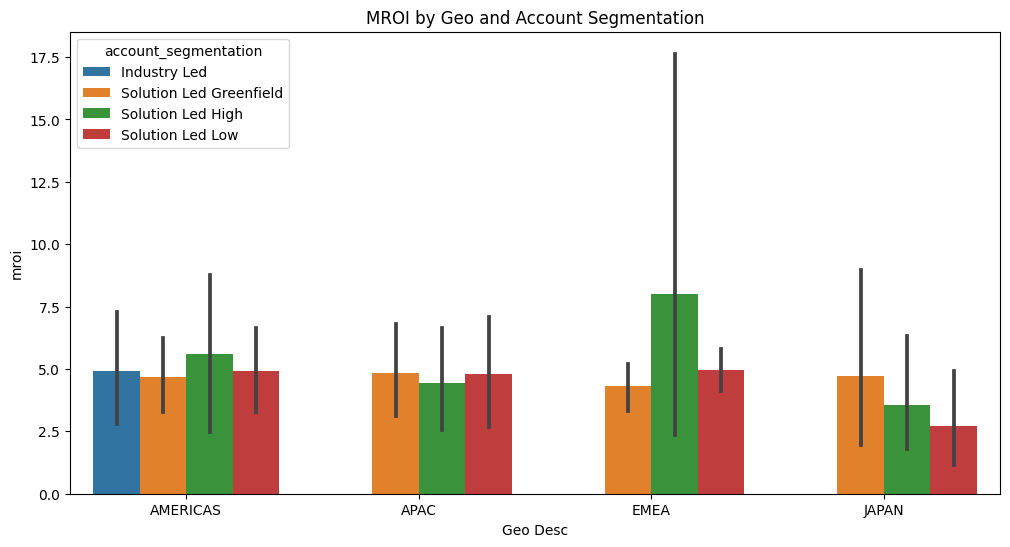

In [ ]:
# Plot MROI for different GEOs, account segments, and solution groups
plt.figure(figsize=(12, 6))
sns.barplot(x='Geo Desc', y='mroi', hue='account_segmentation', data=grouped_data)
plt.title('MROI by Geo and Account Segmentation')
plt.show()

### Normalized MROI heatmap regarding Geo Desc
#### Insight #!:
As we can see the Marketing efforts in Japan have the least profitable and as we can see they have the highest price for Cost per Click.
#### Insight #2 + Recommendation:
mroi in APAC has the highest Marketing ROI which mean more investment would be appreciated. Cost per booking is also the highest, but due to the high MROI, it would worth it.

#### Insight #3:
MROI in AMERICAS and EMEA are almost identical but EMEA has a higher return.

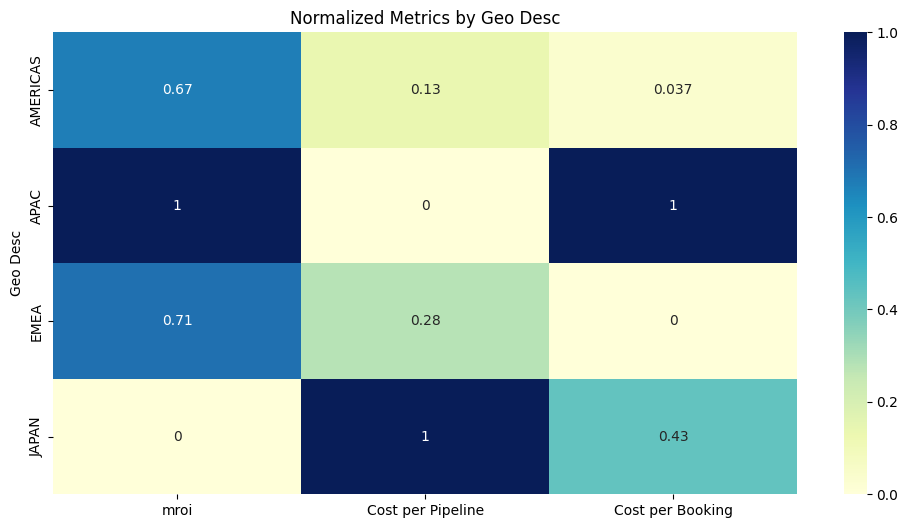

In [ ]:
# Group the data by Geo Desc and calculate mean values for each metric
heatmap_data = final_df_with_metrics.groupby('Geo Desc')[['mroi',
    'Cost per Pipeline',
    'Cost per Booking']].mean().reset_index()

# Set Geo Desc as the index
heatmap_data.set_index('Geo Desc', inplace=True)

# Normalize the data
normalized_data = (heatmap_data - heatmap_data.min()) / (heatmap_data.max() - heatmap_data.min())

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(normalized_data, annot=True, cmap="YlGnBu")
plt.title('Normalized Metrics by Geo Desc')
plt.show()


### Plotting world Map HeatMap corresponding MROI rate
For this plot we would use Plotly library
The plot is not complete at this stage. We need to map all the countries to their corresponding Geo area (AMERICAS, EMEA, JAPAN, APAC)

In [ ]:
heatmap_data.reset_index(inplace=True)

In [ ]:

# Map the Geo Desc to corresponding representative countries (ISO-3 codes)
geo_mapping = {
    'AMERICAS': 'USA',
    'EMEA': 'FRA',
    'JAPAN': 'JPN',
    'APAC': 'IND'
}

# Replace the Geo Desc with the representative country codes
heatmap_data['iso_alpha'] = heatmap_data['Geo Desc'].map(geo_mapping)

# Create the world map heatmap using Plotly
fig = px.choropleth(
    heatmap_data,
    locations='iso_alpha',
    color='mroi',
    hover_name='Geo Desc',
    projection='natural earth'
)

# Customize the map appearance
fig.update_layout(
    title='Reallocated MROI Spend Value by Geo Desc',
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='natural earth'
    )
)

# Show the map
fig.show()

### Using the functions from Phase 3 to identify solution categories with certain MROI conditions

In [ ]:
# MROI > o, or profitable business
geo_app_qtr_acc_sr_metric[geo_app_qtr_acc_sr_metric['mroi'] > 0].reset_index()

,index,Geo Desc,quarter,solution_group,account_segmentation,sales_region,booking_actual_estimate,bookings_tgt,bookings_prof,pipe_actuals,pipe_tgt,booking_effective_value,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,43,AMERICAS,Q2,Content,Solution Led Low,GROWTH INSTALL,106791.115600,122178,49710,414786,474550,106791.115600,0.060101,0.119845,0.406865,0.874062,0.242864,0.943306
1,60,AMERICAS,Q3,CJM,Solution Led High,SOLUTIONS,119359.515036,121480,69293,443049,450920,119359.515036,0.191674,0.156400,0.570407,0.982545,0.226072,0.839155
2,61,AMERICAS,Q3,CJM,Solution Led Low,GROWTH INSTALL,52696.149733,52421,39692,195923,194900,52696.149733,0.219211,0.202590,0.757177,1.005249,0.220605,0.820203
3,65,AMERICAS,Q3,Commerce,Solution Led High,SOLUTIONS,19028.913726,45382,37637,132186,315250,37637.000000,0.005858,0.284728,0.829338,0.419305,0.283069,0.994176
4,83,AMERICAS,Q3,Workfront,Solution Led Greenfield,GROWTH GREENFIELD,62543.475019,73747,25338,218543,257691,62543.475019,0.028592,0.115941,0.343580,0.848082,0.278229,0.972203
5,94,AMERICAS,Q4,Commerce,Solution Led High,SOLUTIONS,53131.464950,62887,33947,186982,221314,53131.464950,0.024699,0.181552,0.539809,0.844872,0.277304,0.975897
6,99,AMERICAS,Q4,Content,Solution Led Greenfield,GROWTH GREENFIELD,189139.759808,223486,94113,652722,771251,189139.759808,0.026450,0.144185,0.421114,0.846316,0.282304,0.974232
7,132,APAC,Q1,Workfront,Solution Led High,APAC,64455.831893,75656,31171,185325,217528,64455.831893,0.033295,0.168196,0.412010,0.851959,0.336592,0.967778
8,236,EMEA,Q1,Workfront,Solution Led High,UKI,51269.398736,47190,36101,248002,228269,51269.398736,0.317691,0.145567,0.765014,1.086446,0.156888,0.758903
9,304,EMEA,Q3,Commerce,Solution Led Greenfield,UKI,40663.519325,47487,29200,210967,246368,40663.519325,0.038569,0.138410,0.614905,0.856308,0.185590,0.962863


In [ ]:
# MROI < -0.4, or heavily in loss 
geo_app_qtr_acc_sr_metric[geo_app_qtr_acc_sr_metric['mroi'] < -0.4].reset_index()

,index,Geo Desc,quarter,solution_group,account_segmentation,sales_region,booking_actual_estimate,bookings_tgt,bookings_prof,pipe_actuals,pipe_tgt,booking_effective_value,mroi,conversion_rate,booking_eff,pipe_eff,Cost per Pipeline,Cost per Booking
0,25,AMERICAS,Q1,Workfront,Solution Led Greenfield,GROWTH GREENFIELD,35452.956783,71667,28332,146780,296711,35452.956783,-0.400018,0.193024,0.395328,0.494690,0.402575,1.666715
1,26,AMERICAS,Q1,Workfront,Solution Led High,SOLUTIONS,30266.126083,66290,30377,153524,336254,30377.000000,-0.444221,0.197865,0.458244,0.456572,0.356013,1.799276
2,73,AMERICAS,Q3,Content,Solution Led Low,LATAM,214077.694272,441195,202672,1084720,2235511,214077.694272,-0.411500,0.186843,0.459371,0.485222,0.335357,1.699237
3,78,AMERICAS,Q3,D&I,Solution Led Low,GROWTH INSTALL,63029.810808,145693,59598,322042,744398,63029.810808,-0.475298,0.185063,0.409066,0.432621,0.373010,1.905844
4,95,AMERICAS,Q4,Commerce,Solution Led Low,GROWTH INSTALL,32998.689544,74181,29058,200086,449793,32998.689544,-0.460478,0.145228,0.391718,0.444840,0.305683,1.853492
5,192,EMEA,Q1,CJM,Solution Led High,UKI,74018.035384,150017,66870,367301,744432,74018.035384,-0.401585,0.182058,0.445749,0.493398,0.336754,1.671081
6,231,EMEA,Q1,P&A,Solution Led Low,WESTERN,119632.447563,242145,116869,621983,1258940,119632.447563,-0.400790,0.187897,0.482641,0.494053,0.320990,1.668865
7,250,EMEA,Q2,Commerce,Solution Led Greenfield,CENTRAL,61747.676427,142962,68397,340340,787976,68397.000000,-0.419741,0.200967,0.478428,0.431917,0.346340,1.723369
8,253,EMEA,Q2,Commerce,Solution Led High,CENTRAL,67962.522877,153645,62749,375981,849992,67962.522877,-0.463516,0.166894,0.408402,0.442335,0.336936,1.863990
9,331,EMEA,Q3,P&A,Solution Led Greenfield,WESTERN,83601.724973,197812,92385,461552,1092089,92385.000000,-0.433560,0.200162,0.467034,0.422632,0.353368,1.765411
